In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, gzip
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split

## Exercise 1

Load MNIST and train an RBM. Remember to **normalize** pixel luminosities to the [0-1] interval.

In [2]:

mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print "dimension de las imagenes y las clases", X.shape, y.shape
numbers_X = X
numbers_y = y


dimension de las imagenes y las clases (1500, 784) (1500,)


the following code counts the numbers of instances for each digit and a sample of the dataset.

In [3]:
print "TRAIN numbers class distribution"
pd.DataFrame(pd.Series(numbers_y).value_counts()).T


TRAIN numbers class distribution


,2,1,7,6,4,0,9,8,5,3
0,186,157,154,152,151,150,146,141,138,125


In [4]:
def show_linearized_images_sample(X, n_images=200, permutation=True):
    plt.figure(figsize=(18,8))
    Xp = np.random.permutation(X) if permutation else X
    img =  np.rollaxis(np.rollaxis(Xp[:n_images].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)
    plt.imshow(img, cmap=plt.cm.Greys_r)
    plt.axis("off")

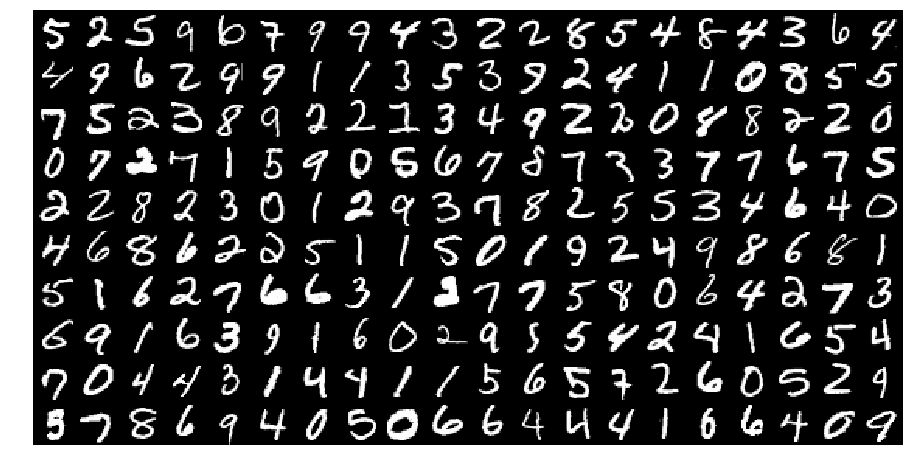

In [5]:
show_linearized_images_sample(numbers_X)


create and train an RBM with 100 components, batch_size 5, learning_rate 0.1 and 100 iterations with `numbers_X`

In [6]:
from sklearn.neural_network import BernoulliRBM

dim_V = X.shape[1]
dim_H = 100

rbm = BernoulliRBM(n_components=dim_H, batch_size=5, learning_rate=.1,n_iter=100, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_



### obtain the `W` matrix and plot the 100 components from the trained RBM (matrix `W`)

you should see something approximately like this

![alt text](./Images/lab_rbm_components.png)

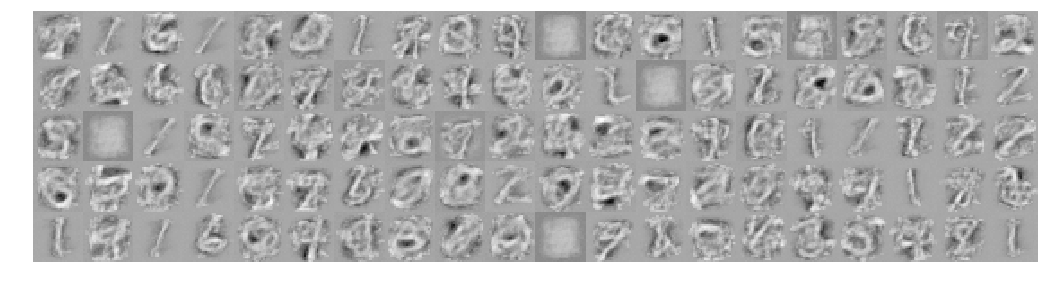

In [7]:
show_linearized_images_sample(W, n_images=len(W))

## Exercise 2

- Load into `fashion_X` 1500 fashion MNIST images and do not forget to normalize their luminosity to the  [0-1] interval.
- Create 1500 random noise images into a variable named `random_imgs` (use `np.random.random(size=(1500,784))`) and set to zero any value under 0.7
- Use the previously trained RBM to compute the free energy of all elements in `fashion_X`, `number_X` , `number_X_sel` and `random_imgs`.
- Plot the histograms. You should see a clear separation of the four datasets.

Your histogram should look roughly like this

![alt text](./Images/lab_rbm_histograms.png)



In [8]:
!pip install keras

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

Using TensorFlow backend.


In [10]:
X_train.shape
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [27]:
fashion_X = X_train[:1500]/255

In [31]:
fashion_X[0,:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [12]:
random_imgs = np.random.random(size=(1500,784))

In [13]:
random_imgs[0,:10]

array([0.98751373, 0.47965901, 0.97180078, 0.2774249 , 0.29039961,
       0.29195688, 0.54252331, 0.75043827, 0.04902963, 0.1040771 ])

In [14]:
random_imgs[random_imgs<0.7]=0

In [15]:
random_imgs[0,:10]

array([0.98751373, 0.        , 0.97180078, 0.        , 0.        ,
       0.        , 0.        , 0.75043827, 0.        , 0.        ])

In [16]:
def free_energy(v,c,b,W):
    return - v.dot(c)- np.logaddexp(0, v.dot(W.T) + b).sum() 
def plot_free_energy(X_domain, X_train, c,b,W):
    plt.figure(figsize=(20,3))
    energies = np.r_[[free_energy(i,c,b,W) for i in X_domain]]
    plt.bar(range(len(energies)), energies, 0.4, label="full domain", alpha=.5)
    plt.xticks(range(len(X_domain)), [str(i) for i in X_domain], rotation="vertical");

    X_idxs = np.r_[[np.sum(i == X_domain, axis=1)==X_domain.shape[1] for i in X_train]].T.sum(axis=1).astype(bool)

    plt.bar(np.arange(len(X_domain))[X_idxs], energies[X_idxs], .9, label="train data")
    plt.ylabel("free energy")
    plt.legend();
rc = np.random.normal(size=dim_V)
rb = np.random.normal(size=dim_H)
rW = np.random.normal(size=(dim_H,dim_V))

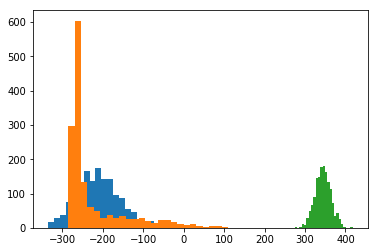

In [26]:
enerMnist=np.r_[[free_energy(i,c,b,W) for i in numbers_X]]
enerFash=np.r_[[free_energy(i,c,b,W) for i in fashion_X]]
enerRand=np.r_[[free_energy(i,c,b,W) for i in random_imgs]]
plt.hist(enerMnist,bins=25);
plt.hist(enerFash,bins=25);
plt.hist(enerRand,bins=25);

In [ ]:
plt.hist(...);
plt.hist(...);
plt.hist(...);

plt.legend();

## Exercise 3: 

Select a random set of 40 digits and perform a 100 steps Gibbs sampling for each one of them. 

Follow the example here: https://www.kaggle.com/nicw102168/restricted-boltzmann-machine-rbm-on-mnist

Your generation might look like:

![alt text](./Images/lab_rbm_generated.png)




In [ ]:
xx = ... # select 40 digits

In [ ]:
for ...
    for ...
        ... # do gibbs sampling

In [ ]:
plt.figure(figsize=(10,20))
show_linearized_images_sample(xx, len(xx), permutation=False)

## Exercise 4

Select a simple sklearn classification method (such as GaussianNB or LogisticRegression), make a random train/test split of 50% on MNIST digits and then:

- train and measure the performance of your selected method directly with the raw MNIST data
- train and measure the perofrmance of your selected method **after** transforming MNIST data with the previously trained RBM

you should see some improvement after transforming the data.

In [ ]:
from sklearn.model_selection import train_test_split

.. create train/test split ...

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

... create and fit classifier ... 
... measure performace in train and test ...